In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [8]:
# 데이터 블러오기
mackerel_output=pd.read_csv('./data/mackerel/부산_고등어_생산량(선어).csv',encoding='cp949')
temperature_dong=pd.read_csv('./data/temperature/208정선_월별.csv')

temperature_dong_output=pd.merge(temperature_dong,mackerel_output,on=['년도','월'])
temperature_dong_output

,년도,월,수온(℃),생산량
0,2008,1,15.65,7994
1,2008,2,13.50,1430
2,2008,3,14.35,3001
3,2008,4,15.20,1385
4,2008,5,17.50,582
...,...,...,...,...
175,2022,8,19.00,3900
176,2022,9,20.90,5494
177,2022,10,22.80,5339
178,2022,11,20.55,24533


In [9]:
month_temperature_dong=temperature_dong_output[temperature_dong_output['월']==7]
month_temperature_dong=month_temperature_dong.reset_index().drop(columns='index')
month_temperature_dong.iloc[:,2:].corr()

,수온(℃),생산량
수온(℃),1.000000,0.230067
생산량,0.230067,1.000000


In [11]:
# 데이터 표준화
scaler_x=StandardScaler()
scaler_x.fit_transform(month_temperature_dong.iloc[:,2:])
test=scaler_x.transform(month_temperature_dong.iloc[:,2:])
standard_data_dong=pd.DataFrame(test)

In [12]:
standard_data_dong.rename(columns={0:'수온',1:'생산량',2:'용존산소',3:'기압',4:'생산량'}, inplace=True)
standard_data_dong

,수온,생산량
0,-1.547670,-0.167927
1,0.149337,-0.213356
2,0.624498,-0.969080
3,-2.226472,-1.049784
4,0.896019,1.691989
5,-1.208268,-0.084551
6,0.352977,-0.056225
7,-0.461586,0.698965
8,-0.257945,0.074717
9,-0.359765,0.919696


In [13]:
standard_data_dong['년도']=month_temperature_dong['년도']
standard_data_dong['월']=month_temperature_dong['월']
standard_data_dong

,수온,생산량,년도,월
0,-1.547670,-0.167927,2008,7
1,0.149337,-0.213356,2009,7
2,0.624498,-0.969080,2010,7
3,-2.226472,-1.049784,2011,7
4,0.896019,1.691989,2012,7
5,-1.208268,-0.084551,2013,7
6,0.352977,-0.056225,2014,7
7,-0.461586,0.698965,2015,7
8,-0.257945,0.074717,2016,7
9,-0.359765,0.919696,2017,7


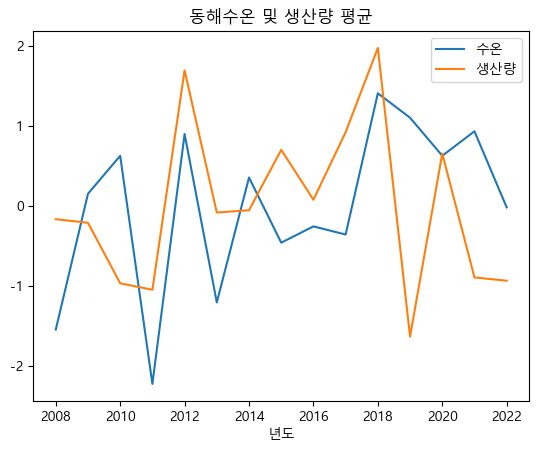

In [13]:
# 수온 - 0 / 생산량 - 1
plt.figure()


plt.title('동해수온 및 생산량 평균')
plt.xlabel('년도')
plt.plot(standard_data_dong['년도'],standard_data_dong['수온'],label='수온')
plt.plot(standard_data_dong['년도'],standard_data_dong['생산량'],label='생산량')
plt.legend()
plt.show()